NOTE: For other methods, replace all terms with "emmvi" for the acronym of new method.
      Check it in all cells of this notebook and just replace it and the method itself!

### LIBRARIES

In [1]:
#LIBRARIES TO BE USED

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import datetime
import os

#VARIABLES USED IN DIFFERENT STEPS OF PROCESS
results_folder = "../_results" #Folder where results and charts will be exported
os.makedirs(results_folder, exist_ok=True) #Create result folder if does not exist
current_datetime = datetime.now().strftime("%Y%m%d%H%M%S") #Get the current date and time

### IMPORT DATASET WITH MISSING VALUES AND THE ORIGINAL

In [2]:
#IMPORT DATASET WITH MISSING VALUES
df_90 = pd.read_csv('../_datasets/google_trend_pinhao_90percent.csv')
df_90["Mes"] = pd.to_datetime(df_90["Mes"], format="%Y-%m", errors='coerce') #Change from string to date format
df_90["Pinhao: (Parana)"] = pd.to_numeric(df_90["Pinhao: (Parana)"], errors='coerce').astype("Int64") #Change from object to int64

#IMPORT ORIGINAL DATASET (WITH ALL VALUES)
df_original = pd.read_csv('../_datasets/google_trend_pinhao_original.csv', skiprows=1, header=None, names=["Mes", "Pinhao: (Parana)"])
df_original["Pinhao: (Parana)"] = pd.to_numeric(df_original["Pinhao: (Parana)"], errors='coerce').astype("Int64") #Change from object to int64
df_original["Mes"] = pd.to_datetime(df_original["Mes"], format="%Y-%m", errors='coerce') #Change from string to date format
df_original = df_original.drop(0) #delete line zero due it is not relevant
df_original = df_original.reset_index(drop=True) #reset the index starting from 0

### APPLICATION OF THE METHOD
##### [!] ATTENTION: For google trends dataframe, imputed values must be int64


In [3]:
#FUNCTION OF THE METHOD
def emmvi(df):
    
    df_imputed = df.copy() #Create a sketch dataframe
    
    # Loop to check all dataframe
    for i, value in enumerate(df_imputed["Pinhao: (Parana)"]):
        
        if pd.isna(value):
            mean_value = np.mean(df_imputed["Pinhao: (Parana)"].dropna())
            df_imputed.loc[i, "Pinhao: (Parana)"] = int(round(mean_value))
    
    return df_imputed
#END OF FUNCTION OF THE METHOD

df_90_emmvi = df_90.copy() #Create a new dataframe that will be manipulated by the method.
df_90_emmvi = emmvi(df_90_emmvi) #Apply method to new dataframe

#Check if dataframe with imputed vales still has missing values
missing_values_count = df_90_emmvi.isnull().sum() 
print("The quantity of missing values are:\n", missing_values_count)


The quantity of missing values are:
 Mes                 0
Pinhao: (Parana)    0
dtype: int64


In [4]:
#JUST TO CHECK IF ALL DATAFRAMES HAVE THE SAME SHAPE AND DTYPE
df_original.info()
df_90.info()
df_90_emmvi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Mes               233 non-null    datetime64[ns]
 1   Pinhao: (Parana)  233 non-null    Int64         
dtypes: Int64(1), datetime64[ns](1)
memory usage: 4.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Mes               233 non-null    datetime64[ns]
 1   Pinhao: (Parana)  210 non-null    Int64         
dtypes: Int64(1), datetime64[ns](1)
memory usage: 4.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Mes               233 non-nul

### PERFORMANCE INDEXES/METRICS

In [5]:
#Error indexes
mae = mean_absolute_error(df_original["Pinhao: (Parana)"], df_90_emmvi["Pinhao: (Parana)"])
mse = mean_squared_error(df_original["Pinhao: (Parana)"], df_90_emmvi["Pinhao: (Parana)"])
r2 = r2_score(df_original["Pinhao: (Parana)"], df_90_emmvi["Pinhao: (Parana)"])

#Accuracry index (How many imputation data are right)
threshold = 0.1  #Maximum deviation accepted to be considered right (more than this will be considered erro)
accuracy = np.mean(np.abs(df_90_emmvi["Pinhao: (Parana)"] - df_original["Pinhao: (Parana)"]) <= threshold)

#Acceptance range for the indexes/metrics
mae_good_range = np.std(df_original["Pinhao: (Parana)"], ddof=1) #Standard deviation 
mse_good_range = (np.std(df_original["Pinhao: (Parana)"], ddof=1)**2) #Squared standard deviation 
r2_good_range = (0.80, 1)
accuracy_good_range = (0.9, 1)  

#Compare indexes results with range and define if they are good or bad
mae_status = "Good performance!" if (mae_good_range*-1) <= mae <= mae_good_range else "[!] BAD PERFORMANCE"
mse_status = "Good performance!" if (mse_good_range*-1) <= mse <= mse_good_range else "[!] BAD PERFORMANCE"
r2_status = "Good performance!" if r2_good_range[0] <= r2 <= r2_good_range[1] else "[!] BAD PERFORMANCE"
accuracy_status = "Good performance!" if accuracy_good_range[0] <= accuracy <= accuracy_good_range[1] else "[!] BAD PERFORMANCE"

#Print values
print(f'Mean Absolute Error (MAE): {mae} {mae_status}')
print(f'Mean Squared Error (MSE): {mse} {mse_status}')
print(f'R-squared Score (R²): {r2} {r2_status}')
print(f'Accuracy: {mae} {accuracy_status}')

Mean Absolute Error (MAE): 1.648068669527897 Good performance!
Mean Squared Error (MSE): 56.17167381974249 Good performance!
R-squared Score (R²): 0.8387993983120767 Good performance!
Accuracy: 1.648068669527897 Good performance!


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:96: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.

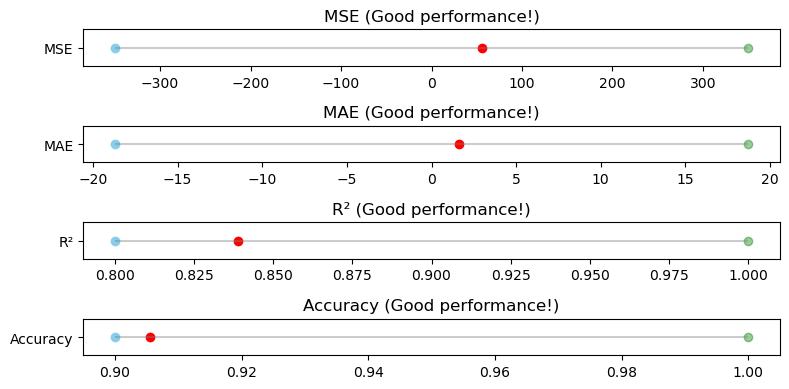

In [6]:
#CHART OF ACCEPTANCE RANGE AND INDEXES VALUES

#Create a new dataframe specific for this plot
indexes_plot = pd.DataFrame({'group': ['R²', 'MAE', 'MSE', 'Accuracy'],
                   'min': [r2_good_range[0], (mae_good_range * -1), (mse_good_range * -1), accuracy_good_range[0]],
                   'max': [r2_good_range[1], mae_good_range, mse_good_range, accuracy_good_range[1]],
                   'value': [r2, mae, mse, accuracy],
                   'status': [mae_status, mse_status, r2_status, accuracy_status]})
ordered_indexes_plot = indexes_plot.sort_values(by='min') #put the dataframe in order to plot

#Subplot1 config
indexes_plot_filename = f"{results_folder}/df_90_emmvi_chart1_indexes_plot_{current_datetime}.jpg"
fig, axs = plt.subplots(4, 1, figsize=(8, 4))

#Charts of subplot1
for i, ax in enumerate(axs):
    ax.hlines(y=1, xmin=ordered_indexes_plot['min'].iloc[i], xmax=ordered_indexes_plot['max'].iloc[i], color='grey', alpha=0.4)
    ax.scatter(ordered_indexes_plot['min'].iloc[i], 1, color='skyblue', alpha=1, label='Min')
    ax.scatter(ordered_indexes_plot['max'].iloc[i], 1, color='green', alpha=0.4, label='Max')
    ax.scatter(ordered_indexes_plot['value'].iloc[i], 1, color='red', alpha=1, label='Index Value')
    ax.set_yticks([1])
    ax.set_yticklabels([ordered_indexes_plot['group'].iloc[i]])
    title = "{} ({})".format(ordered_indexes_plot['group'].iloc[i], ordered_indexes_plot['status'].iloc[i])
    ax.set_title(title)
    ax.grid(False)


plt.tight_layout()
plt.show()




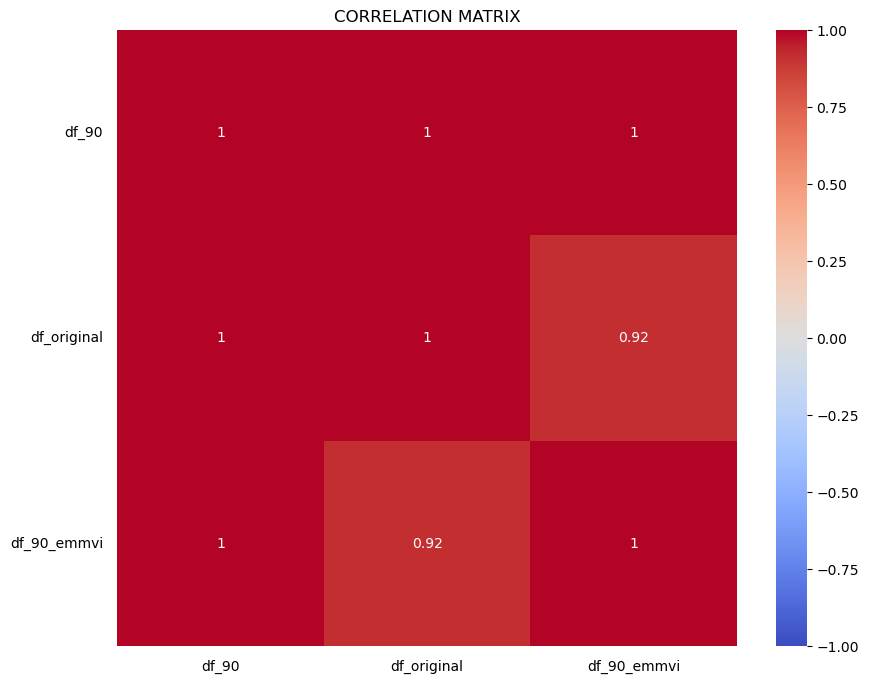

In [7]:
# Correlation between original dataframe, dataframe with missing data, and dataframe with imputed values
df_90_emmvi_selected = df_90_emmvi["Pinhao: (Parana)"]  # Dataframe with imputed values
df_90_selected = df_90["Pinhao: (Parana)"]  # Dataframe with missing values
df_original_selected = df_original["Pinhao: (Parana)"]  # Original dataframe

# Correlation between them
dfs_merged = pd.concat([df_90["Mes"], df_90["Pinhao: (Parana)"], df_original["Pinhao: (Parana)"], df_90_emmvi["Pinhao: (Parana)"]], axis=1)
dfs_merged.set_index("Mes", inplace=True)
dfs_merged.columns = ["df_90", "df_original", "df_90_emmvi"]
correlation_matrix = dfs_merged.corr()

# Extract correlation values
correlation_original_90 = correlation_matrix.loc["df_original", "df_90"]
correlation_original_imputed = correlation_matrix.loc["df_original", "df_90_emmvi"]
correlation_90_imputed = correlation_matrix.loc['df_90', 'df_90_emmvi']

# Chart plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.tick_params(axis='both', which='both', length=0, labelrotation=0, labelsize=10, pad=10)
plt.title(f'CORRELATION MATRIX')
plt.show()


In [8]:
#JUST TO SHOW THE DIFFERENT VALUES BETWEEN ORIGINAL DATAFRAME, MISSING VALUES DATAFRAME AND IMPUTED DATAFRAME
dfs_merged_filtered = dfs_merged[dfs_merged.nunique(axis=1) > 1]
dfs_merged_filtered

,df_90,df_original,df_90_emmvi
Mes,,,
2013-01-01,<NA>,10,24
2013-05-01,<NA>,34,24
2014-07-01,<NA>,22,24
2014-11-01,<NA>,13,24
2015-05-01,<NA>,54,24
2015-07-01,<NA>,42,24
2016-05-01,<NA>,64,24
2017-01-01,<NA>,14,24
2017-07-01,<NA>,25,24


## CHARTS

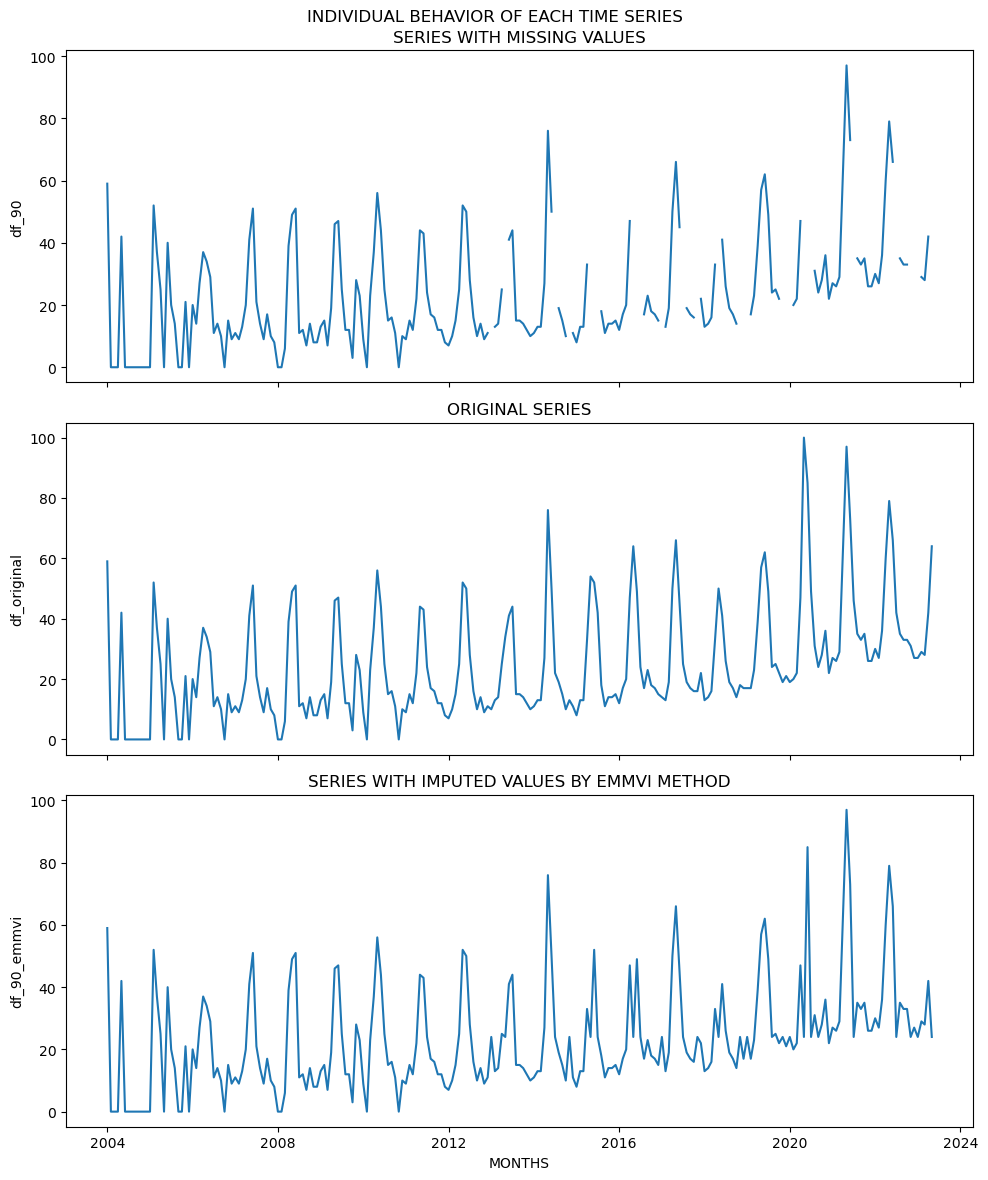

In [9]:
#LINEPLOT OF ALL DATAFRAMES

numeric_columns = ["df_90", "df_original", "df_90_emmvi"]
dfs_merged[numeric_columns] = dfs_merged[numeric_columns].astype(float)

#Subplot config
lineplot_all_dataframes = f"{results_folder}/df_90_emmvi_chart2_lineplot_all_dataframes_{current_datetime}.jpg"
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

#Lineplot 1
axs[0].plot(dfs_merged.index, dfs_merged["df_90"])
axs[0].set_ylabel("df_90")
axs[0].set_title("SERIES WITH MISSING VALUES")

#Lineplot 2
axs[1].plot(dfs_merged.index, dfs_merged["df_original"])
axs[1].set_ylabel("df_original")
axs[1].set_title("ORIGINAL SERIES")

#Lineplot 3
axs[2].plot(dfs_merged.index, dfs_merged["df_90_emmvi"])
axs[2].set_ylabel("df_90_emmvi")
axs[2].set_title("SERIES WITH IMPUTED VALUES BY EMMVI METHOD")

# Label Config
axs[-1].set_xlabel("MONTHS")

# Title Config
plt.suptitle("INDIVIDUAL BEHAVIOR OF EACH TIME SERIES")

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

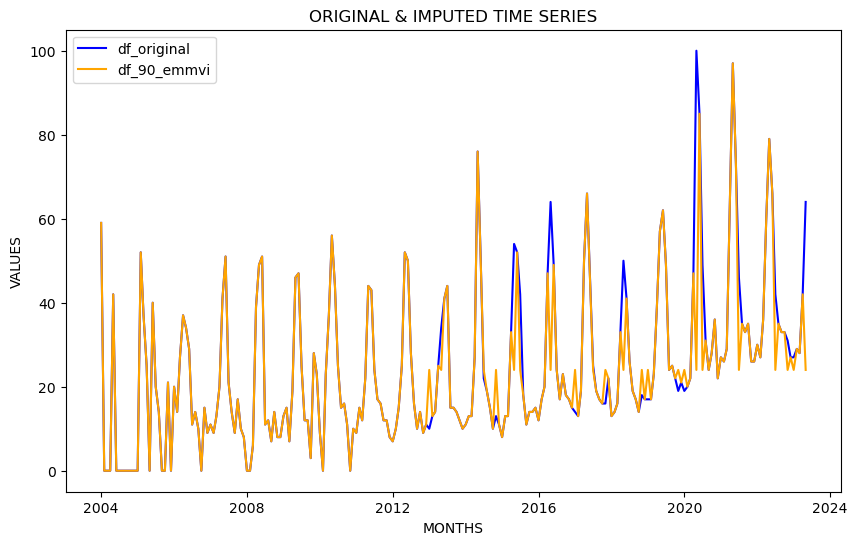

In [10]:
#LINEPLOT OF ORIGINAL DATASET AND IMPUTED DATASET OVERLAPPED
lineplot_overlapped_series = f"{results_folder}/df_90_emmvi_chart3_lineplot_overlapped_series_{current_datetime}.jpg"
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))

plt.plot(dfs_merged.index, dfs_merged["df_original"], color="blue", label="df_original")
plt.plot(dfs_merged.index, dfs_merged["df_90_emmvi"], color="orange", label="df_90_emmvi")

plt.xlabel("MONTHS")
plt.ylabel("VALUES")
plt.title("ORIGINAL & IMPUTED TIME SERIES")
plt.legend()

plt.show()

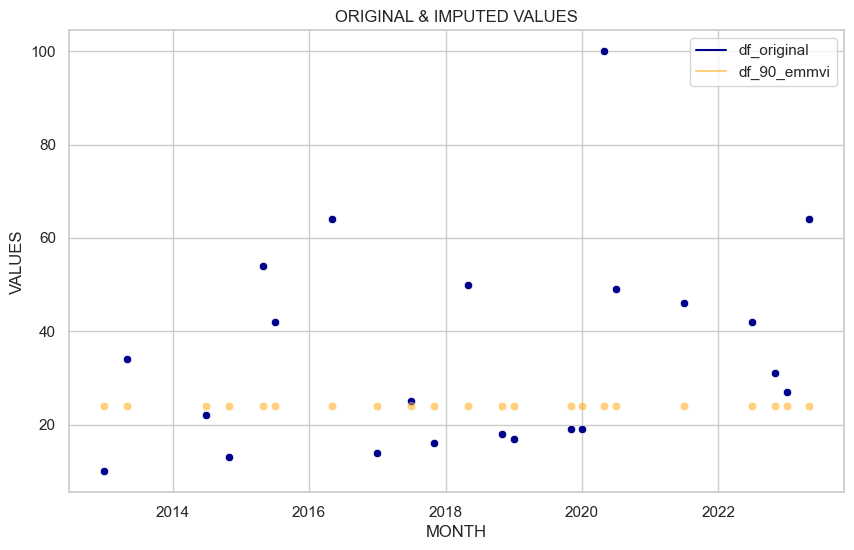

In [11]:
#SCATTERPLOT COMPARING THE ORIGINAL DATAS WITH THE IMPUTED ONES

scatterplot_original_imputed = f"{results_folder}/df_90_emmvi_chart4_scatterplot_original_imputed_{current_datetime}.jpg"
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfs_merged_filtered, x=dfs_merged_filtered.index, y="df_original", color="darkblue", label="df_original")
sns.scatterplot(data=dfs_merged_filtered, x=dfs_merged_filtered.index, y="df_90_emmvi", color="orange", alpha=0.5, label="df_90_emmvi")

plt.xlabel("MONTH")
plt.ylabel("VALUES")
plt.title("ORIGINAL & IMPUTED VALUES")

blue_patch = plt.Line2D([], [], color='darkblue', label='df_original')
orange_patch = plt.Line2D([], [], color='orange', alpha=0.5, label='df_90_emmvi')
plt.legend(handles=[blue_patch, orange_patch])

plt.show()


In [12]:
from pathlib import Path
import openpyxl

#Ask user if they want to export the data
user_input = input("[!] Do you want to export the results to the log file? (yes/no): ")

if user_input.lower() == "yes":
    
    #Path where log must be recorded, readed or modified
    results_path = "../_results/results.xlsx"
    results_path = Path(results_path)
    #Create the dataframe with the results values
    results_df = pd.DataFrame({
        "date_and_time": [datetime.now()],
        "dataframe_and_method": ["df_90_emmvi"],
        "result_mae": [mae],
        "result_mse": [mse],
        "result_r2": [r2],
        "result_accuracy": [accuracy],
        "status_mae": [mae_status],
        "status_mse": [mse_status],
        "status_r2": [r2_status],
        "status_accurancy": [accuracy_status],
        "min_range_mae": [mae_good_range*-1],
        "min_range_mse": [mse_good_range*-1],
        "min_range_r2": [r2_good_range[0]],
        "min_range_accuracy": [accuracy_good_range[0]],
        "max_range_mae": [mae_good_range],
        "max_range_mse": [mse_good_range],
        "max_range_r2": [r2_good_range[1]],
        "max_range_accuracy": [accuracy_good_range[1]],
        "correlation_original_90": [correlation_original_90],
        "correlation_original_imputed": [correlation_original_imputed],
        "correlation_90_imputed": [correlation_90_imputed]
    })

    #Check if the file exists
    if results_path.exists(): #Load log file that exists
        workbook = openpyxl.load_workbook(results_path) #Open log file (excel file in this case)
        worksheet = workbook["Results"] #Find the worksheet where results will be recorded
        last_row = worksheet.max_row #Find the last row in the worksheet to record the results
        for index, value in enumerate(results_df.columns, start=1): #Add the new row to the worksheet
            worksheet.cell(row=last_row+1, column=index, value=results_df[value][0])
        workbook.save(results_path) #Save the workbook
    else: #Create a new log file (in excel) in case it do not exist yet.
        results_df.to_excel(results_path, index=False, sheet_name='Results')

    #Export charts
    plt.savefig(indexes_plot_filename)
    plt.savefig(lineplot_all_dataframes)
    plt.savefig(lineplot_overlapped_series)
    plt.savefig(scatterplot_original_imputed)
    plt.close()
else:
    print("Data export canceled by user. Exiting the code...")
